# **Implementation and optimization of the mean-timer technique in drift tube detectors**
##### Laboratory of Computational Physics project
##### AY 2021/2022 University of Padua

#### *Students*: Barone Francesco Pio, Valenti Lorenzo, Nagaro Gianmarco, Ninni Daniele

### **Appendix 1B** - run on larger dataset: RUN_0333

In [1]:
from bin.plotters import plot_event  # import the plotter functions
from bin.plotters import plot_event_from_dataframe
from bin.data_selection import *     # import the preprocessing functions
from bin.meantimers import *         # import the meantimers functions

import pandas as pd
import numpy as np
import math
from scipy import stats
import seaborn as sns

In [2]:
run_files =  ['data_000000.txt','data_000001.txt','data_000002.txt','data_000003.txt',
              'data_000004.txt','data_000005.txt','data_000006.txt','data_000007.txt',
              'data_000008.txt','data_000009.txt']    
run_pwd = '/data/Run000333/'

collective_file = '/home/lab/dat/333_part_meantimers.txt'

collect = []

for file in run_files:
    print(f' > processing {file}')
    data = pd.read_csv( run_pwd + file, sep=",")
    data = preprocess_dataset(data)
    no_triggers = data[ data.trigger == 0 ] 
    evs, _ = enhanced_close_hit_clustering(no_triggers, keep_rejected = False)
    events = export_events_to_dataframe(evs) 
    
    mt = meantimer(events)
    
    del events
    del evs
    del data
    del no_triggers
    collect.append(mt)

print(len(collect))

 > processing data_000000.txt
 > processing data_000001.txt
 > processing data_000002.txt
 > processing data_000003.txt
 > processing data_000004.txt
 > processing data_000005.txt
 > processing data_000006.txt
 > processing data_000007.txt
 > processing data_000008.txt
 > processing data_000009.txt
10


In [3]:
collective = pd.concat(collect, ignore_index = True)
collective.reset_index(drop=True)
collective

,L1_HIT,L1_TIME,L1_CELL,L2_HIT,L2_TIME,L2_CELL,L3_HIT,L3_TIME,L3_CELL,L4_HIT,...,PATTERN,ANGLE,L1_DRIFT,L1_X,L2_DRIFT,L2_X,L3_DRIFT,L3_X,L4_DRIFT,L4_X
0,3870,2.116573e+06,0,3877,2.116907e+06,0,3873,2.116587e+06,0,3876,...,LRLR,-3.8935,29.895833,-1.609776,363.229167,19.558494,43.229167,-2.327724,310.729167,16.731571
1,5204,2.929309e+06,0,5207,2.929422e+06,0,<NA>,NaN,<NA>,5206,...,LR_R,2.17439,143.333333,-7.717949,255.833333,13.775641,NaN,NaN,274.166667,14.762821
2,6644,3.663319e+06,0,6643,3.663251e+06,0,6645,3.663373e+06,0,<NA>,...,LRL_,-6.40065,215.625000,-11.610577,147.291667,7.931090,269.791667,-14.527244,NaN,NaN
3,10575,5.881173e+06,0,10582,5.881396e+06,0,10578,5.881369e+06,0,10574,...,LRLR,-23.6923,38.854167,-2.092147,261.354167,14.072917,234.687500,-12.637019,33.020833,1.778045
4,14055,7.999308e+06,0,14053,7.999035e+06,0,14054,7.999254e+06,0,<NA>,...,LRL_,6.40065,345.208333,-18.588141,71.875000,3.870192,291.041667,-15.671474,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578843,<NA>,NaN,<NA>,1252301,7.791099e+08,15,1252303,7.791101e+08,15,1252302,...,_RLR,16.896,NaN,NaN,51.666667,2.782051,265.000000,-14.269231,198.333333,10.679487
578844,1272669,7.921915e+08,15,1272667,7.921914e+08,15,1272671,7.921915e+08,15,<NA>,...,LRL_,0.494404,238.958333,-12.866987,153.125000,8.245192,234.791667,-12.642628,NaN,NaN
578845,1274077,7.930410e+08,15,<NA>,NaN,<NA>,1274075,7.930409e+08,15,1274072,...,L_LR,11.0353,284.375000,-15.312500,NaN,NaN,190.208333,-10.241987,246.875000,13.293269
578846,1290685,8.045982e+08,15,<NA>,NaN,<NA>,1290687,8.045982e+08,15,1290686,...,L_LR,-1.87811,99.791667,-5.373397,NaN,NaN,115.625000,-6.225962,266.458333,14.347756


In [4]:
collective.to_csv(collective_file, index=False)
del collective

coll = pd.read_csv(collective_file, sep=",")

### plot random events

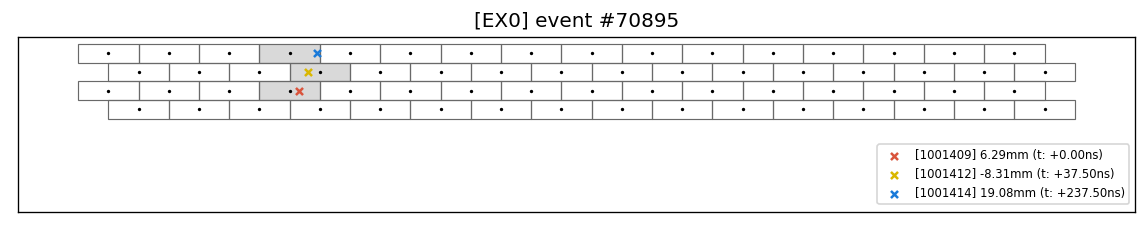

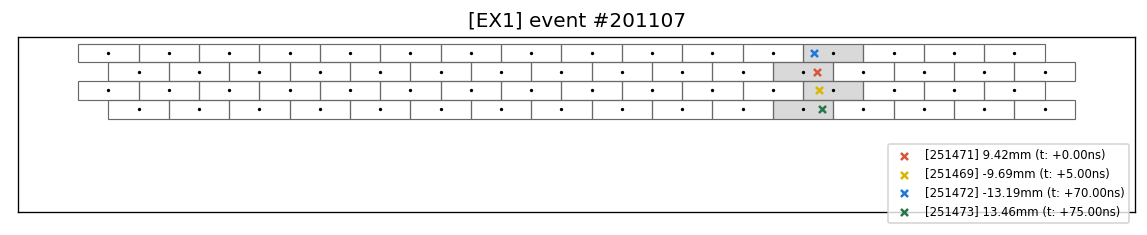

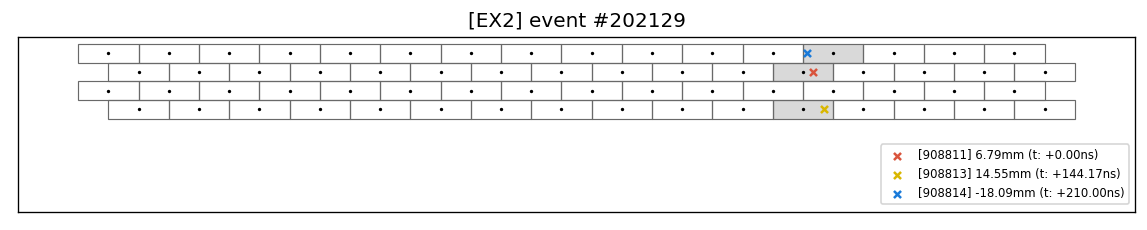

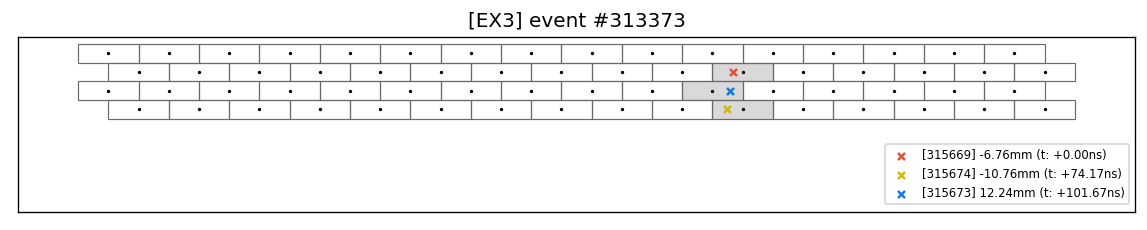

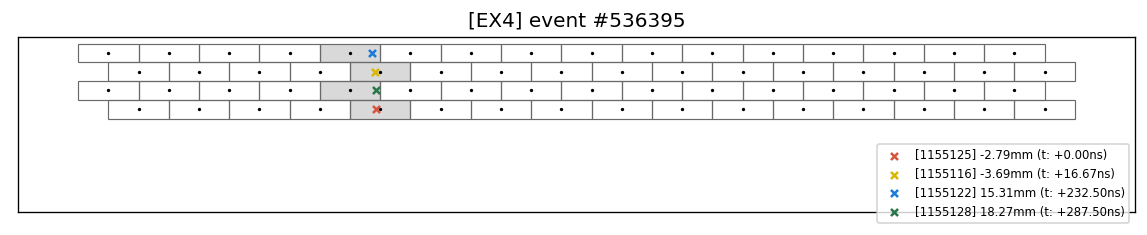

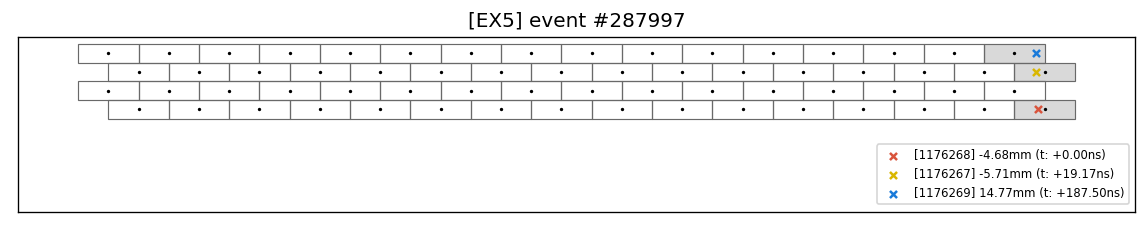

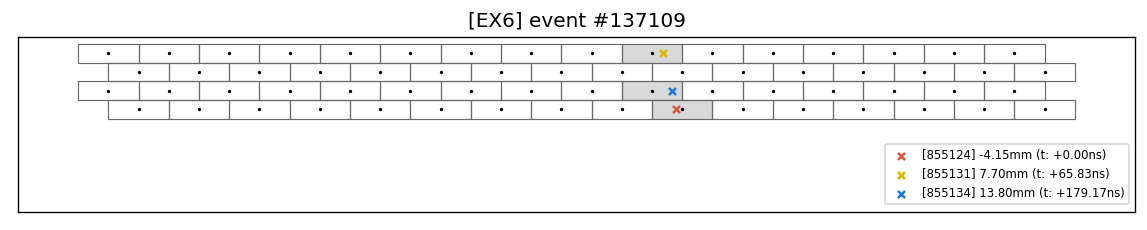

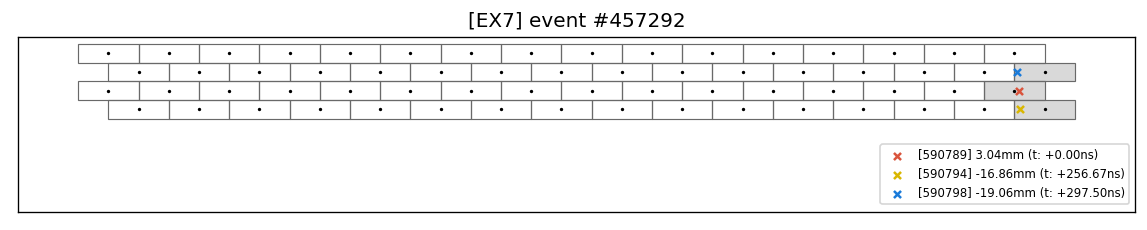

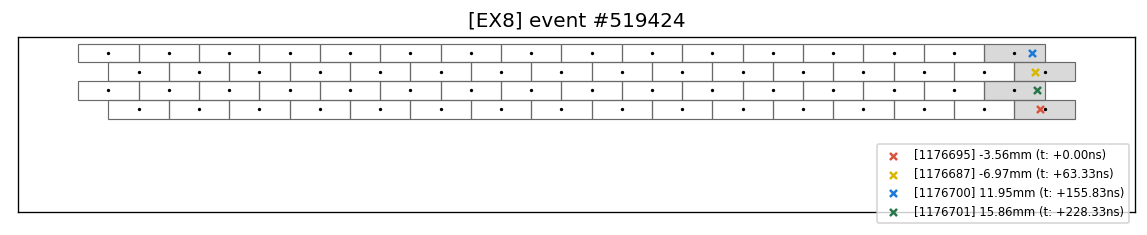

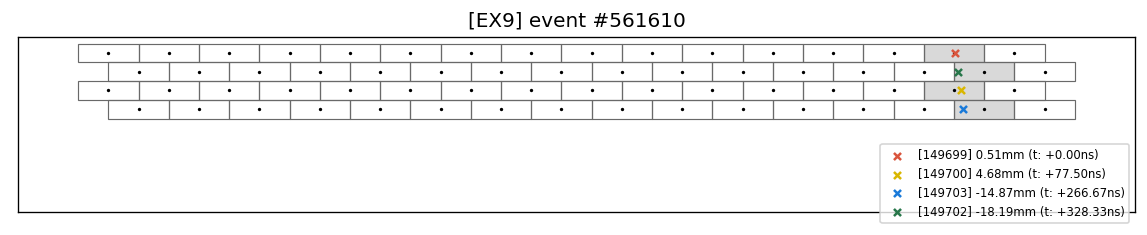

In [5]:
for i in range(10):
    y = np.random.randint(0, len(coll))
    plot_event_from_dataframe(coll, index = y, title = f'[EX{i}] event #{y}');

## Statistics

#### Distributions of the drift times

In [6]:
events = coll
events[events['DETECTOR'] == 1]

,L1_HIT,L1_TIME,L1_CELL,L2_HIT,L2_TIME,L2_CELL,L3_HIT,L3_TIME,L3_CELL,L4_HIT,...,PATTERN,ANGLE,L1_DRIFT,L1_X,L2_DRIFT,L2_X,L3_DRIFT,L3_X,L4_DRIFT,L4_X
0,3870.0,2.116573e+06,0.0,3877.0,2.116907e+06,0.0,3873.0,2.116587e+06,0.0,3876.0,...,LRLR,-3.893499,29.895833,-1.609776,363.229167,19.558494,43.229167,-2.327724,310.729167,16.731571
1,5204.0,2.929309e+06,0.0,5207.0,2.929422e+06,0.0,NaN,NaN,NaN,5206.0,...,LR_R,2.174387,143.333333,-7.717949,255.833333,13.775641,NaN,NaN,274.166667,14.762821
2,6644.0,3.663319e+06,0.0,6643.0,3.663251e+06,0.0,6645.0,3.663373e+06,0.0,NaN,...,LRL_,-6.400652,215.625000,-11.610577,147.291667,7.931090,269.791667,-14.527244,NaN,NaN
3,10575.0,5.881173e+06,0.0,10582.0,5.881396e+06,0.0,10578.0,5.881369e+06,0.0,10574.0,...,LRLR,-23.692306,38.854167,-2.092147,261.354167,14.072917,234.687500,-12.637019,33.020833,1.778045
4,14055.0,7.999308e+06,0.0,14053.0,7.999035e+06,0.0,14054.0,7.999254e+06,0.0,NaN,...,LRL_,6.400652,345.208333,-18.588141,71.875000,3.870192,291.041667,-15.671474,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578576,1309914.0,8.181491e+08,15.0,1309911.0,8.181488e+08,15.0,1309913.0,8.181491e+08,15.0,1309910.0,...,LRLR,-0.148324,322.395833,-17.359776,66.562500,3.584135,324.062500,-17.449519,65.729167,3.539263
578577,1309992.0,8.181957e+08,15.0,1309997.0,8.181959e+08,15.0,NaN,NaN,NaN,1309996.0,...,LR_R,-5.814073,72.291667,-3.892628,293.125000,15.783654,NaN,NaN,243.958333,13.136218
578578,1310341.0,8.184119e+08,15.0,NaN,NaN,NaN,1310340.0,8.184119e+08,15.0,1310342.0,...,L_LR,2.470549,51.041667,-2.748397,NaN,NaN,30.208333,-1.626603,370.208333,19.934295
578579,1310544.0,8.185420e+08,15.0,1310542.0,8.185420e+08,15.0,1310543.0,8.185420e+08,15.0,1310540.0,...,LRLR,-2.075418,180.208333,-9.703526,196.041667,10.556090,202.708333,-10.915064,183.541667,9.883013


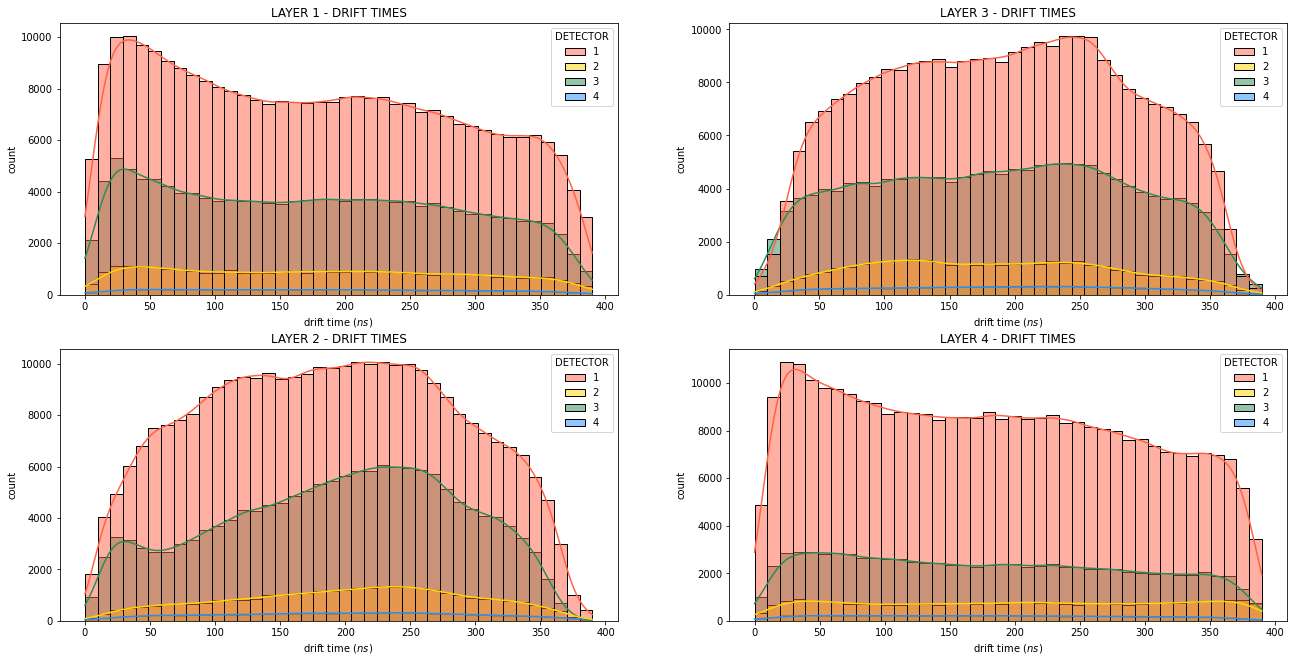

In [7]:
cmap = ['tomato', 'gold', 'seagreen', 'dodgerblue']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(22, 11))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        layer = str(i+2*j+1)
        plot = sns.histplot(data=events, x='L'+layer+'_DRIFT', hue='DETECTOR', stat='count', bins=40, kde=True, palette=cmap, ax=ax[i][j])
        plot.set(title='LAYER '+layer+' - DRIFT TIMES', xlabel='drift time $(ns)$', ylabel='count')

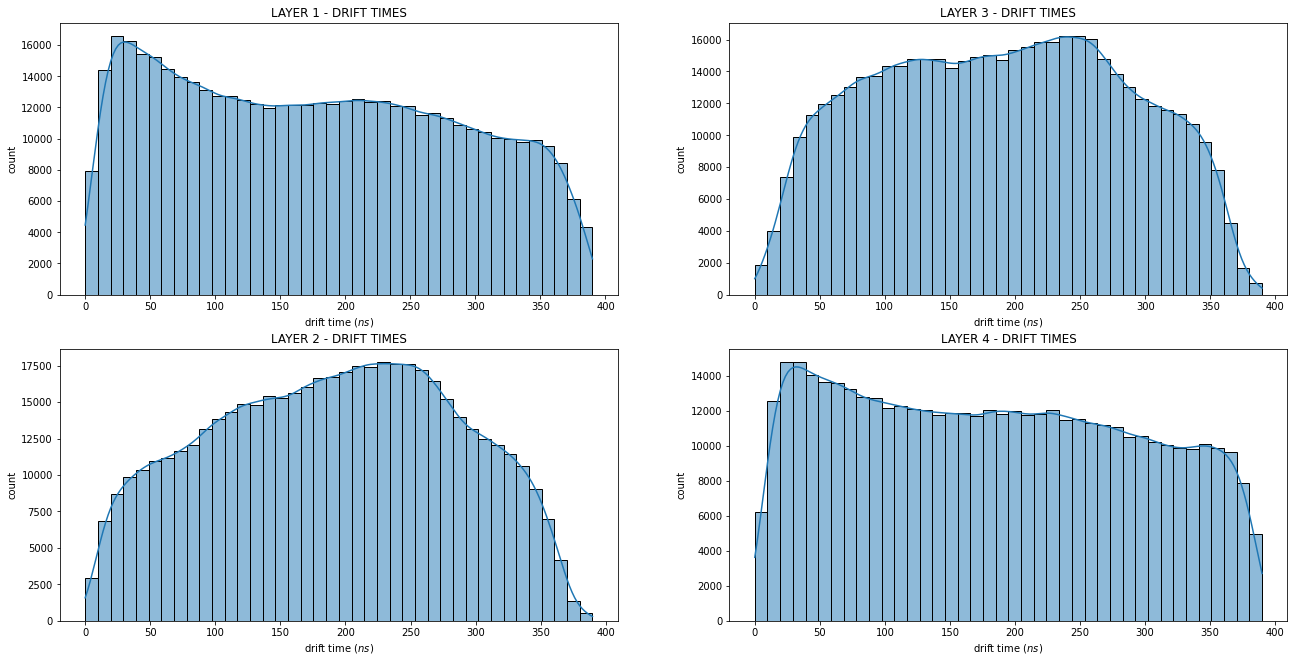

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(22, 11))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        layer = str(i+2*j+1)
        plot = sns.histplot(data=events, x='L'+layer+'_DRIFT', stat='count', bins=40, kde=True, ax=ax[i][j])
        plot.set(title='LAYER '+layer+' - DRIFT TIMES', xlabel='drift time $(ns)$', ylabel='count')

#### Distributions of the crossing angles

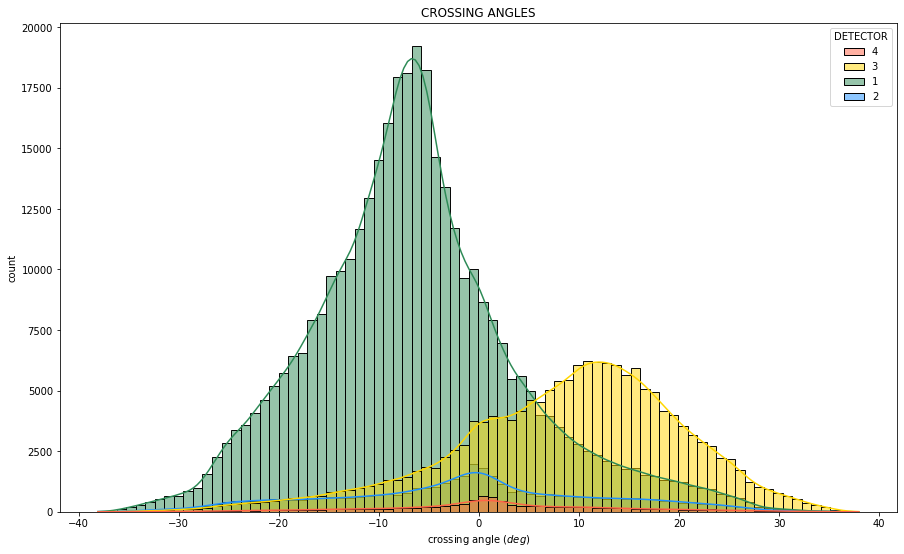

In [9]:
fig, ax = plt.subplots(figsize=(15, 9))
plot = sns.histplot(data=events, x='ANGLE', hue='DETECTOR', hue_order=[4, 3, 1, 2], stat='count', bins=80, kde=True, palette=cmap, ax=ax)
plot.set(title='CROSSING ANGLES', xlabel='crossing angle $(deg)$', ylabel='count')
plt.show()

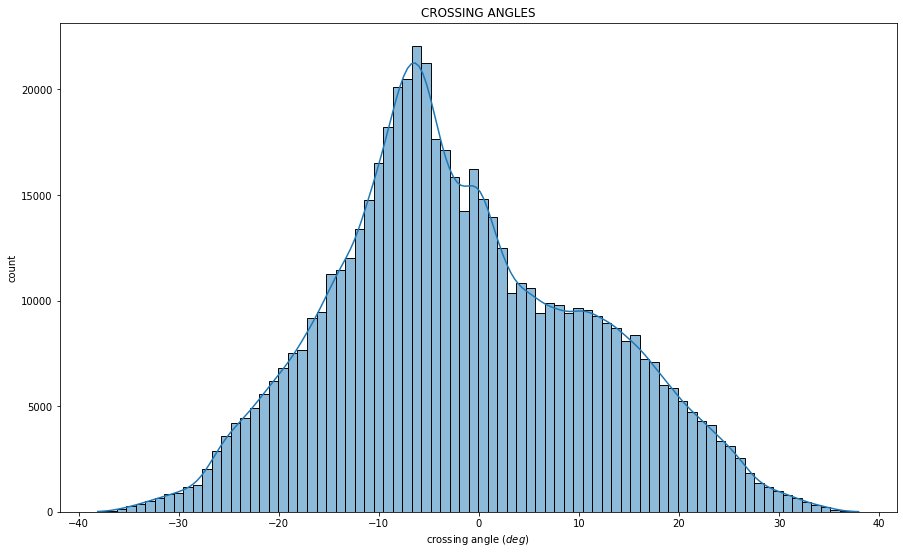

In [10]:
fig, ax = plt.subplots(figsize=(15, 9))
plot = sns.histplot(data=events, x='ANGLE', stat='count', bins=80, kde=True, ax=ax)
plot.set(title='CROSSING ANGLES', xlabel='crossing angle $(deg)$', ylabel='count')
plt.show()

End of file.